Only reading in one email for now

In [1]:
enroncsv = "enron.csv"
metadataHeaders = 'data/metadataHeaders.csv'

In [2]:
import pandas as pd

columns = pd.read_csv(metadataHeaders, sep=',').columns.tolist()
columns

['Filename',
 'Person',
 'Directory',
 'Message-ID',
 'Date',
 'From',
 'To',
 'Subject',
 'Cc',
 'Time',
 'Attendees',
 'Re',
 'Mime-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'Bcc',
 'X-From',
 'X-To',
 'X-cc',
 'X-bcc',
 'X-Folder',
 'X-Origin',
 'X-FileName']

In [3]:
df = pd.read_csv(enroncsv, names=columns, sep='|', low_memory=False)

print("-- DONE --")

-- DONE --


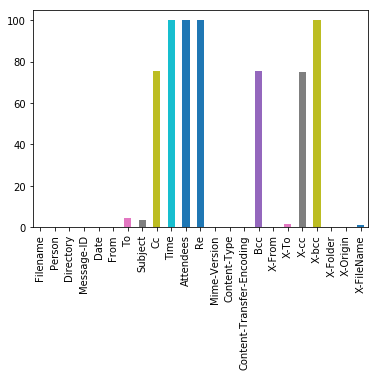

Filename                      0.000000
Person                        0.000000
Directory                     0.000000
Message-ID                    0.000387
Date                          0.000387
From                          0.000387
To                            4.222880
Subject                       3.713189
Cc                           75.279489
Time                         99.999807
Attendees                    99.994201
Re                           99.998840
Mime-Version                  0.011597
Content-Type                  0.011597
Content-Transfer-Encoding     0.010631
Bcc                          75.284322
X-From                        0.011404
X-To                          1.770680
X-cc                         75.084079
X-bcc                        99.959410
X-Folder                      0.012370
X-Origin                      0.006958
X-FileName                    0.820493
dtype: float64

In [5]:
import matplotlib.pyplot as plt

numberOfRows = len(df.index)
missingData = (numberOfRows - df.count()) / numberOfRows * 100
plot = missingData.plot(kind='bar')

plt.show()
missingData

Create an array of attributes for a single person

In [6]:
authSus = df.loc[df['Person'] == 'guzman-m']
len(authSus)

6054

Display all the attributes to be used for authorship analysis

In [7]:
authSus['Message-ID']
authSus['Date']
authSus['From']
authSus['To']
authSus['Bcc']
authSus['Subject']
authSus['Person']
authSus['X-Origin']
authSus['Content-Type']

1             text/plain; charset="us-ascii"
2             text/plain; charset="us-ascii"
3             text/plain; charset="us-ascii"
4             text/plain; charset="us-ascii"
5       text/plain; charset="ANSI_X3.4-1968"
6             text/plain; charset="us-ascii"
7             text/plain; charset="us-ascii"
8             text/plain; charset="us-ascii"
9             text/plain; charset="us-ascii"
10      text/plain; charset="ANSI_X3.4-1968"
11            text/plain; charset="us-ascii"
12            text/plain; charset="us-ascii"
13            text/plain; charset="us-ascii"
14            text/plain; charset="us-ascii"
15            text/plain; charset="us-ascii"
16      text/plain; charset="ANSI_X3.4-1968"
17            text/plain; charset="us-ascii"
18            text/plain; charset="us-ascii"
19            text/plain; charset="us-ascii"
20            text/plain; charset="us-ascii"
21            text/plain; charset="us-ascii"
22            text/plain; charset="us-ascii"
23        

Using features and attributes for filtering

In [8]:
susEmails = df.loc[df['Person'] != df['X-Origin'].str.lower()]
len(susEmails)

35496

In [9]:
smallList = susEmails.loc[susEmails['Person'] != 'inbox']
smallList = smallList.loc[smallList['Person'] != 'deleted_items']
smallList = smallList.loc[smallList['Person'] != 'global']
smallList = smallList.loc[smallList['Person'] != '2_trash']
smallList = smallList.loc[smallList['Person'] != 'hr']
smallList = smallList.loc[smallList['Person'] != 'egm']
smallList = smallList.loc[smallList['Person'] != 'prc']
smallList = smallList.loc[smallList['Person'] != 'deleted_items']
smallList['Person']

0              maildir
6196            bass-e
6486            bass-e
11375           bass-e
11994           bass-e
12264           bass-e
12522           bass-e
16201       generation
17656     rto_campaign
18144      2002_budget
18145      2002_budget
29986       dasovich-j
29987       dasovich-j
29992       dasovich-j
29993       dasovich-j
29996       dasovich-j
29999       dasovich-j
30002       dasovich-j
30003       dasovich-j
30014       dasovich-j
30024       dasovich-j
30036       dasovich-j
30052       dasovich-j
30065       dasovich-j
30087       dasovich-j
30088       dasovich-j
30094       dasovich-j
30095       dasovich-j
30099       dasovich-j
30115       dasovich-j
              ...     
506115             rac
506116             rac
506117             rac
506118             rac
506119             rac
506120             rac
506121             rac
506122             rac
506123             rac
506124             rac
506125             rac
506126             rac
506127     

Emails with `Bcc` usage, that could possibly be spam-based

In [10]:
spamAnalysis = df['Bcc'].dropna()
spamAnalysis

1         bert.meyers@enron.com, bill.williams.iii@enron...
2                                        bill.iii@enron.com
3         bert.meyers@enron.com, bill.williams.iii@enron...
7         bert.meyers@enron.com, bill.williams.iii@enron...
12        bert.meyers@enron.com, bill.williams.iii@enron...
14        gfergus@brobeck.com, richard.sanders@enron.com...
16        ben.pacewic@phs.com, eholm@aracnet.com, kss@rd...
19        bert.meyers@enron.com, bill.williams.iii@enron...
21        bert.meyers@enron.com, bill.williams.iii@enron...
23        bert.meyers@enron.com, bill.williams.iii@enron...
24                                 portland.shift@enron.com
25        bert.meyers@enron.com, bill.williams.iii@enron...
26        bert.meyers@enron.com, bill.williams.iii@enron...
29             john.forney@enron.com, mark.guzman@enron.com
30        bert.meyers@enron.com, bill.williams.iii@enron...
31        dustin-sievers@hoffmancorp.com, leslievankleek...
33        bert.meyers@enron.com, bill.wi

Suspicious emails that are missing vital `To` information in the headings

In [11]:
missingTo = df.loc[df['To'].isnull()]
missingTo['Subject']

0                                                       NaN
972                                            working hard
1806                                               schedule
1919      Re: Reminder for Excel Charting and Organizing...
2077      Re: Reminder for Excel Charting and Organizing...
2144                          Lunch meeting with Tim Beldon
2536                                               schedule
2606                                      Brown bag meeting
2761      - Inventory Collected from CN=Mark Guzman/OU=P...
3106                                          Group Meeting
3124                             Mike Swerzbin out all day.
3246                                           working hard
3279                                        Weather Meeting
3325                                Brown Bag Lunch Meeting
4089      - Inventory Collected from CN=Mark Guzman/OU=P...
4234                                          Group Meeting
4460                                    

Ways from can be used to trail information

In [12]:
fromfeature = df.loc[df['From'].isnull()]
fromfeature

,Filename,Person,Directory,Message-ID,Date,From,To,Subject,Cc,Time,...,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
0,.DS_Store,maildir,maildir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137510,.DS_Store,maildir,kuykendall-t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking for non-existent `Message-ID`

In [13]:
nullID = df.loc[df['Message-ID'].isnull()]
len(nullID)

2

Checking `Content-Type` for deviations from established typs or null values

In [15]:
nullCt = df.loc[df['Content-Type'].isnull()]
len(dateId)

60

In [22]:
aveType = df.loc[df['Content-Type'] != 'text/plain; charset="us-ascii"']
aveType = aveType.loc[aveType['Content-Type'] != 'text/plain; charset="ANSI_X3.4-1968"']
aveType['Content-Type']

0         NaN
6196      NaN
6486      NaN
11375     NaN
11994     NaN
12264     NaN
12522     NaN
36529     NaN
55227     NaN
67656     NaN
86635     NaN
87823     NaN
87835     NaN
119360    NaN
119380    NaN
119458    NaN
119543    NaN
120639    NaN
120901    NaN
132800    NaN
132803    NaN
132804    NaN
132806    NaN
132809    NaN
137510    NaN
137547    NaN
150922    NaN
151420    NaN
151827    NaN
151831    NaN
151841    NaN
171845    NaN
173815    NaN
221554    NaN
221678    NaN
237626    NaN
245154    NaN
248783    NaN
277526    NaN
277538    NaN
289020    NaN
289048    NaN
289894    NaN
289966    NaN
290168    NaN
297862    NaN
298428    NaN
298893    NaN
300187    NaN
387625    NaN
391523    NaN
394087    NaN
399883    NaN
402113    NaN
481335    NaN
481352    NaN
481367    NaN
481528    NaN
481533    NaN
481545    NaN
Name: Content-Type, dtype: object